## Final Project Submission

- Student Name: Adam Pell
- Student Pace: Self-Paced
- Scheduled project review date/time
- Instructor Name: Morgan jones
- Blog Post URL: 

# Telecommunications Customer Behavior Analysis

# Overview

This project will use different classifiers to analyze and predict customer churn for a telecommunications company.

Iterative analysis of multiple features creates a better understanding of which factors contribute to a customer switching providers. My firm, Pell & Associates Data Solutions, has developed a classifier model that is capable of predicting with up to 93% accuracy whether a customer will switch providers or not. Being able to accurately forecast churn and knowing its key predictors is vital for any telecommunications business, as it allows them to stay ahead of customer needs and expand their services with a clear perspective on risk.

# Business Problem

Telecommunications companies provide some of the most valuable services in the world to their customers allowing people to communicate across states, borders, and continents. The market is valued at over 1.7 trillion dollars globally. Telecoms companies are in a unique position because, to the average consumer, the level of service between most of these companies is identical. Moreover, there is an abundance of choice; many reputable companies exist in most countries. Since most people cannot go without a service provider, they may be more likely to switch to another provider if they perceive a problem with their current one. For service providers in America and abroad, it is important to foresee the risk of customers switching providers, as unexpected departures can lead to a drop in revenues and a lack of clarity regarding how to stem the tide.

Pell & Associates Data Solutions is here to help provide that clarity. This project will examine over 3300 customer records from across America, modeling trends and building predictive classifiers that are able to accurately assess whether future customers are at risk of leaving.

# Data Understanding

The available data comes from a telecom compoany's record of customer information. Our target for this analysis will be the "churn" column. In this case, churn is a metric that reports whether a customer switched providers or not. For this project, the "negative case" will be 0, indicating that the customer did not "churn", or switch. The positive case will be 1, meaning that the customer did switch. My analysis will examine features that are likely to play a role in customer churn. They include:

- State
- Account Length (in months)
- Area Code
- International Plan (y/n)
- Voice Mail Plan (y/n)
- No. of Voicemail Messages
- Total Day Minutes, Calls, and Charges
- Total Evening Minutes, Calls, and Charges
- Total Night Minutes, Calls, and Charges
- Total International Minutes, Calls, and Charges
- No. of Customer Service Calls

I have included the above features because they all stand to have a connection to customer churn. I have excluded features such as "phone number" because that is unlikely to have any correlation to a customer's decision to switch providers.

### Limitations

The dataset I am working with is relatively small, only containing 3333 rows of information. There is also no description of the dataset included from the source, so the data lacks context such as when these records are from.

These limitations may make it more difficult for my model to generalize to updated or more modern data.

# Data Analysis

## Preparation and EDA

Before we begin the iterative modeling process, we need to take a look at the data to better understand its structure features. We will check for outliers, visualize our target and some correlations, and build some pipelines to speed up preprocessing down the line.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, \
StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, plot_confusion_matrix, confusion_matrix, classification_report, \
ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
# Loading dataset
df = pd.read_csv('data/customer_churn_data.csv')

# Priting first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


All our data is nicely laid out for us. Right off the bat, I notice that our target column is currently categorical, so we will want to transform that into binary down the line. There is also definitely a large majority of numeric columns, with only a single truly categorical one (state).

The next step is to check for missing values, which I can do below:

In [3]:
# Printing dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

No missing values! That's a plus. For preprocessing, we'll need to know which columns are numeric and which are categorical. For the categorica columns, we need to take a look and see what we're going to do with them.

It also appears that our target column ("churn") is a categorical boolean. We can change this to 1s and 0s by casting the whole column as an integer.

Customer phone numbers won't be too useful in this case, so we can drop that column. For two other categorical features (international plan and voice mail plan), we can also make those binary choices into 1s and 0s. That way, we don't have to bother one-hot encoding them later.

In [4]:
# Casting churn as an integer
df['churn'] = df['churn'].astype(int)

In [5]:
# Dropping phone number column
df = df.drop('phone number', axis=1)

In [6]:
# Replacing two string columns with integers
df[['international plan', 'voice mail plan']] = df[['international plan', 'voice mail plan']].replace(
    {'yes': 1, "no": 0})

Now that we've better organized our data, we can check out some correlation values.

<AxesSubplot:>

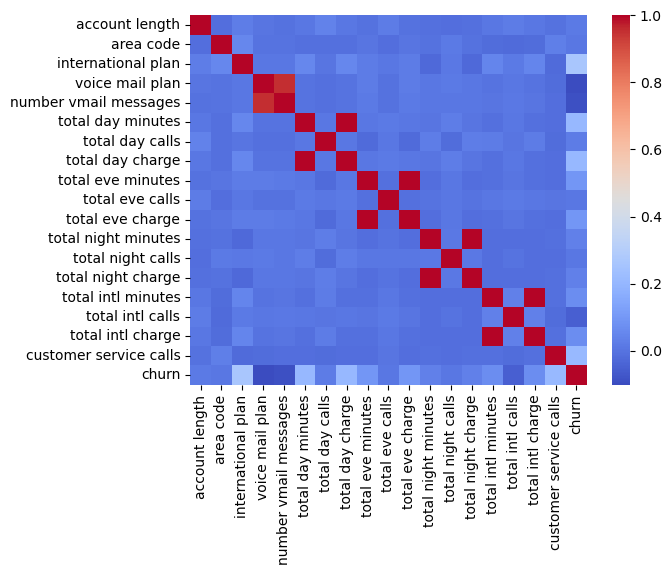

In [7]:
# Creating correlation heatmap
df_corrs = df.corr()
sns.heatmap(df_corrs, cmap='coolwarm')

This seems like a fairly normal correlation chart. We see that red diagonal streak, which is caused by identical variables correlating perfectly with each other. The red squares surrounding the streak is likely caused by strong correlations between calls, minutes, and charge for each time of day.

On the bottom row, you can see that certain features have slightly higher correlations with churn. The two that stand out to me are customer service calls and having an international plan. More customer service calls would make sense because those normally are a product of customer dissatisfaction. Having an international plan might lead to higher charges or more headache, so that could be another common cause for churn. We can take a closer look at the numerical value of these correlations below:

In [8]:
# Dropping categorical data
numeric_cols = df.drop('state', axis=1)
numeric_cols.corrwith(df['churn']).sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
dtype: float64

Indeed, an international plan and customer service calls are the two largest indicators of churn. Total day minutes and the associated charges are also correlated, indicating that perhaps some customers are switching providers for better value on their day minutes.

We can take a look at some key statistics for the entire dataset below:

In [9]:
# Getting key metrics for dataset
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


We can see that the average customer has been using this company as their provider for 101 months, which is just under eight and a half years. Of these customers, about 10% have an international plan. The average customer also makes about 1.5 customer service calls.

We can better see each state's churn rate by creating a map. 

In [10]:
# Creating new dataframe for churn rate
churn_rate_by_state = df.groupby('state')['churn'].mean() * 100
churn_rate_by_state_df = churn_rate_by_state.reset_index()
churn_rate_by_state_df.columns = ['State', 'Churn Rate']
churn_rate_by_state_df.sort_values(by='Churn Rate', ascending=False)

,State,Churn Rate
31,NJ,26.470588
4,CA,26.470588
43,TX,25.000000
20,MD,24.285714
40,SC,23.333333
22,MI,21.917808
25,MS,21.538462
33,NV,21.212121
47,WA,21.212121
21,ME,20.967742


In [13]:
# Creating interactive map of churn rate
import plotly.express as px

fig = px.choropleth(churn_rate_by_state_df,
                    locations='State',  
                    locationmode='USA-states',
                    color='Churn Rate',
                    hover_name='State',
                    color_continuous_scale=px.colors.sequential.Greens,
                    scope='usa',
                    title='Churn Rate by State')
fig.show()

In case the map is not loading for some readers, here is a hardcoded image:

<img src="images/churn_rate_map.png" width="600" height="400">

As we can see above, the states with darker shading have higher churn rates. States like New Jersey, California, and Texas have the highest rates, while Arizona, Alaska, and Hawaii have almost no churn. While the Northeast tends to be somewhat darker-shaded overall--suggesting higher churn rates-- there doesn't seem to be a huge geographical trend. High-churn states are fairly evenly distributed, with both coasts having representatives.

Let's make a quick visualization of the tatget column.

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

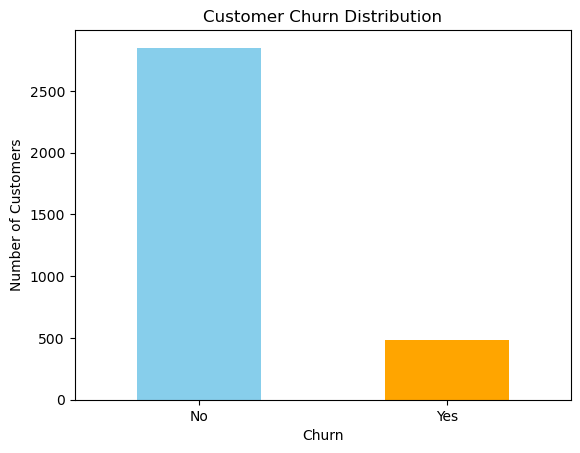

time: 58.7 ms (started: 2024-02-29 13:27:24 -05:00)


In [32]:
# Getting churn counts
churn_counts = df['churn'].value_counts()

# Plotting bar chart
fig, ax = plt.subplots()
churn_counts.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Customer Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Number of Customers')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

Based on the bar chart above and the target mean, it seems that the majority of the target cases are 0s, or the negative case. We can confirm this by checking the value counts below:

In [33]:
# Getting churn value counts as percentage
(df['churn'].value_counts()/3333) * 100

0    85.508551
1    14.491449
Name: churn, dtype: float64

time: 2.11 ms (started: 2024-02-29 13:27:24 -05:00)


Indeed, it looks like we have a pretty large class imbalance within the target column. The negative case makes up 85.5% of the total cases in the dataset. This means that, if we made a model that only guessed the negative case every time, we would already wind up with 85.5% accuracy! That's no good. We can change this by resampling the data to make it more even. However, to avoid data leakage, let's first split the data into train and test sets. After that, we can set up some handy pipelines to preprocess our data before feeding it into some models.

In [34]:
# Defining target and predictors
y = df['churn']

X = df.drop('churn', axis=1)

time: 3.05 ms (started: 2024-02-29 13:27:24 -05:00)


In [35]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

time: 4.7 ms (started: 2024-02-29 13:27:24 -05:00)


In [36]:
# Checking for class imbalance after split
print((y_train.value_counts()/len(y_train)) * 100)

print((y_test.value_counts()/len(y_test)) * 100)

0    85.67427
1    14.32573
Name: churn, dtype: float64
0    85.01199
1    14.98801
Name: churn, dtype: float64
time: 6.16 ms (started: 2024-02-29 13:27:25 -05:00)


As we can see, the target ratios are still imbalanced after the split. Now, we can go about building some pipelines to rectify that!

In [37]:
# Creating numeric scaling pipeline
numeric_pipe = Pipeline(steps=[('scaler', StandardScaler())]) # Applies Standard Scaler

# Creating one-hot encoding pipeline
categorical_pipe = Pipeline([('ohe', OneHotEncoder(sparse=True, handle_unknown='ignore'))]) # Applies one-hot encoder

time: 1.49 ms (started: 2024-02-29 13:27:25 -05:00)


We've created two separate pipelines. One will apply standard scaling to any columns it encounters, and the other will one-hot encode. Now, we can combine these columns to sort the data into the different subpipelines for processing.

In [38]:
# Combining pipelines to handle all columns
preprocessing_pipe = ColumnTransformer(transformers=[
                                ('numeric_pipe', numeric_pipe, 
                                make_column_selector(dtype_include=['int', 'float'])), # Applies scaling to numeric columns
    
                                ('categorical_pipe', categorical_pipe, 
                                make_column_selector(dtype_include='object'))]) # Applies OHE to categorical columns

time: 1.53 ms (started: 2024-02-29 13:27:25 -05:00)


The column transformer above will work to preprocess our data for us. For rebalancing our target samples, we have to use a different pipeline, which we will create once we begin modeling.

# Preliminary Modeling

#### Our target metrics for model performance will be recall and accuracy.

Before we dive into modeling, I'll want to see how long each model takes to fit. This could have implications for the stakeholder, especially when the model is used on much larger datasets.

In [39]:
# Loading execution timer
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 663 µs (started: 2024-02-29 13:27:26 -05:00)


## Logistic Regression

Now that we have our preprocessing pipeline, we can forego a lot of the manual preprocessing steps and just use our trusty pipelines! We're going to make a new pipeline here that incorporates a Synthetic Minority Over-sampling Technique, or SMOTE. This will balance out the target samples, making our model's results more significant. 

Note that, for logistic regressions, we are going to be scaling our data. For future models, we may not need to.

In [40]:
# Creating logistic regression pipeline
logreg_pipe = ImPipeline(steps=[('preprocessor', preprocessing_pipe), # Our preprocessing pipe from above
                        ('sm', SMOTE(random_state=42)), # Resamples target
                        ('logreg', LogisticRegression(solver='liblinear', random_state=42))]) # Runs regression

time: 1.34 ms (started: 2024-02-29 13:27:26 -05:00)


The pipeline above allows us to automate all our preprocessing, resampling, and modeling steps. As you will see below, the pipeline will automatically bin the data and process it as needed, ignoring unecessary methods for each step.

In [41]:
# Fitting regression to training data
logreg_model = logreg_pipe.fit(X_train, y_train)
logreg_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x297692910>),
                                                 ('categorical_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x297692d30>)])),
                ('sm', SMOTE(random_state=42)),
                ('logreg',
                 LogisticRegression(random_state=42, solver='liblinear'))])

time: 58.3 ms (started: 2024-02-29 13:27:27 -05:00)


In [42]:
# Scoring model on training data
logreg_model.score(X_train, y_train)

0.7799119647859144

time: 9.42 ms (started: 2024-02-29 13:27:27 -05:00)


In [43]:
# Getting predictions on test set
logreg_y_pred = logreg_model.predict(X_test)

time: 10.8 ms (started: 2024-02-29 13:27:27 -05:00)


In [44]:
# Printing various metrics on test data
print(classification_report(y_test, logreg_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       709
           1       0.37      0.78      0.50       125

    accuracy                           0.77       834
   macro avg       0.66      0.77      0.68       834
weighted avg       0.86      0.77      0.80       834

time: 6.03 ms (started: 2024-02-29 13:27:27 -05:00)


Our logistic regression classifier leaves plenty to be desired. It performs similarly on both the training and test data, with an accuracy score of around 77% on both. An important point is that it consistently fails to identify positive cases in the test set. This is a problem because we want the model to accurately predict positive cases, because false negatives will lead to unexpected churn numbers over time.

Based on this model's performance, the next model I am going to try is a decision tree. Decision trees can often better capture non-linear relationships. They can also be less sensitive to outliers. Another plus is that they need one less preprocessing step, because numeric columns don't need to be scaled. Finally, random forests let us really dig into individual feature importances, letting us know what matters the most for the model. Let's build one of these models below.

## Decision Tree

For this next model, we will try is a simple decision tree. For this model, we do not need to scale our data because the model will perform splits the same way no matter the scale. Therefore, this time around, we only need a one-hot encoder as our preprocessor. 

In [45]:
# Creating preprocessing pipeline
dec_tree_preprocessor = ColumnTransformer(transformers=[
                                          ('ohe', OneHotEncoder(sparse=True, handle_unknown='ignore'), 
                                           [0])], remainder='passthrough')

time: 1.23 ms (started: 2024-02-29 13:27:28 -05:00)


In [46]:
# Creating decision tree pipeline
dec_tree_pipe = ImPipeline(steps=[('ohe', dec_tree_preprocessor), # One-hot preprocessor
                                  ('sm', SMOTE(random_state=42)), # Resampling
                                  ('tree', DecisionTreeClassifier(random_state=42))]) # Fits decision tree

time: 828 µs (started: 2024-02-29 13:27:28 -05:00)


In [47]:
# Fitting model to training data
dec_tree_model = dec_tree_pipe.fit(X_train, y_train)
dec_tree_model

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0])])),
                ('sm', SMOTE(random_state=42)),
                ('tree', DecisionTreeClassifier(random_state=42))])

time: 100 ms (started: 2024-02-29 13:27:28 -05:00)


In [48]:
# Scoring model on training data
print('Score on training data: ', dec_tree_model.score(X_train, y_train))

Score on training data:  1.0
time: 4.19 ms (started: 2024-02-29 13:27:28 -05:00)


### Red flag!

A perfect score on the training data indicates that the model is very likely overfitting, picking up noise in the training set that will not generalize well to unseen data. Let's confirm this assumption below.

In [49]:
# Getting predictions on test set
dec_tree_y_pred = dec_tree_model.predict(X_test)

time: 11.7 ms (started: 2024-02-29 13:27:29 -05:00)


In [50]:
# Printing various metrics on test data
print(classification_report(y_test, dec_tree_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       709
           1       0.66      0.78      0.72       125

    accuracy                           0.91       834
   macro avg       0.81      0.86      0.83       834
weighted avg       0.92      0.91      0.91       834

time: 9.32 ms (started: 2024-02-29 13:27:29 -05:00)


As expected, we do see some overfitting going on, although the model actually performs quite well on the test set overall. We see an f1 score of 91% which is excellent, as well as a vastly improved recall for both positive and negative cases. Our recall for the positive case continues to be a problem, and we can see that predictions on the positive case are consistently far lower than on the negative case. For our next model, we will try to solve this by applying an ensemble method.

Ensemble methods such as random forests might be able to help us reduce overfitting and create further improvements to our accuracy and recall scores, as they often outperform simple decision trees. They also usually will be better suited to handle noise in the data and datasets with many features. Let's build one below.

## Random Forest

Our final base model will be an ensemble method that makes use of many decision trees, employing a voting system for making predictions on each data point. Just like before, we won't need scaling steps here, only preprocessing for our categorical "state" column.

In [51]:
# Creating random forest pipeline
random_forest_pipe = ImPipeline(steps=[('ohe', dec_tree_preprocessor), # One-hot encoding
                                  ('sm', SMOTE(random_state=42)), # Resampling
                                  ('tree', RandomForestClassifier(random_state=42))]) # Fits random forest

time: 785 µs (started: 2024-02-29 13:27:29 -05:00)


In [52]:
# Fitting to training data
random_forest_model = random_forest_pipe.fit(X_train, y_train)

time: 590 ms (started: 2024-02-29 13:27:29 -05:00)


Notice the time stamp for the cell above. We can see as I fit this model that it takes more than 5 times as long to fit as our normal decision tree and about 50 times as long as our logistic regression! This is due to the model's complexity; it has to run many decision trees in parallel, then aggregating assessments and voting on what the right answer should be.

In [53]:
# Scoring model on training data
print('Score on training data:', random_forest_model.score(X_train, y_train))

Score on training data: 1.0
time: 23.9 ms (started: 2024-02-29 13:27:30 -05:00)


Again we see a perfect score on the training data. This indicates another instance of overfitting. This time around, however, we should see a smaller disparity between the training and test data.

In [54]:
# Getting predictions on test set
random_forest_y_pred = random_forest_model.predict(X_test)

time: 10.9 ms (started: 2024-02-29 13:27:30 -05:00)


In [55]:
# Printing various metrics on test data
print(classification_report(y_test, random_forest_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       709
           1       0.83      0.70      0.76       125

    accuracy                           0.93       834
   macro avg       0.89      0.84      0.86       834
weighted avg       0.93      0.93      0.93       834

time: 4.96 ms (started: 2024-02-29 13:27:30 -05:00)


We see the precision and recall scores on the report, but we can visualize this further by creating a confusion matrix, which will show us exactly how many predictions the model is getting right and wrong (and where):

In [56]:
# Making confusion matrix
random_forest_cm = confusion_matrix(y_test, random_forest_y_pred)

time: 4.17 ms (started: 2024-02-29 13:27:31 -05:00)


<Figure size 800x600 with 0 Axes>

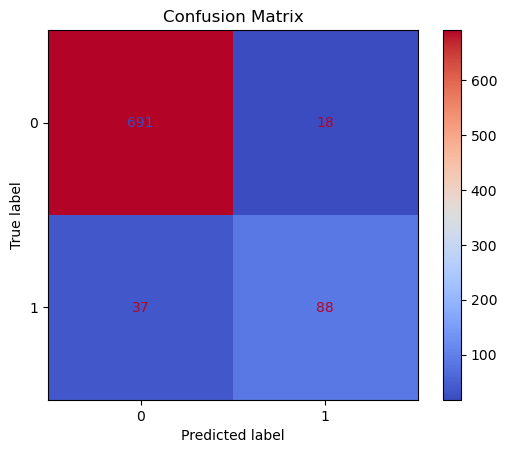

time: 79.1 ms (started: 2024-02-29 13:27:31 -05:00)


In [57]:
# Displaying confusion matrix
rf = random_forest_pipe.named_steps['tree']
cm_display = ConfusionMatrixDisplay(confusion_matrix=random_forest_cm, display_labels=rf.classes_)

plt.figure(figsize=(8, 6))
cm_display.plot(cmap='coolwarm', xticks_rotation='horizontal')
plt.title("Confusion Matrix")
plt.show()

This gives us a better sense of how the model is performing on a more granular level. We see 37 false negatives, which means that our model is predicting that a small percentage of people will not switch providers when they actually do. On the other side, we see 18 false positives, meaning that the model predicts some people will churn when they actually won't. Overall, though, we see that the model performs well on predictions. However, that bottom row shows us where we need to make improvements, as the model is incorrectly predicting that a fair ratio of people will stay when they actually are leaving.

Before we move onto tuning, we can also take a look at the depth of each tree in our model. This will tell us how far down our tree is splitting, which could inform how we tweak the hyperparameters if we tune it.

In [58]:
rf_tree = random_forest_pipe.named_steps['tree']

for x, estimator in enumerate(rf_tree.estimators_):
    depth = estimator.tree_.max_depth
    depths = []
    print("Depth of tree", x + 1, ":", depth)
    depths.append(depth)
    
print('Average Tree Depth: ', sum(depths)/len(depths))

Depth of tree 1 : 20
Depth of tree 2 : 30
Depth of tree 3 : 25
Depth of tree 4 : 23
Depth of tree 5 : 23
Depth of tree 6 : 24
Depth of tree 7 : 32
Depth of tree 8 : 26
Depth of tree 9 : 23
Depth of tree 10 : 25
Depth of tree 11 : 29
Depth of tree 12 : 24
Depth of tree 13 : 34
Depth of tree 14 : 29
Depth of tree 15 : 30
Depth of tree 16 : 23
Depth of tree 17 : 29
Depth of tree 18 : 26
Depth of tree 19 : 31
Depth of tree 20 : 27
Depth of tree 21 : 25
Depth of tree 22 : 25
Depth of tree 23 : 27
Depth of tree 24 : 23
Depth of tree 25 : 33
Depth of tree 26 : 25
Depth of tree 27 : 27
Depth of tree 28 : 25
Depth of tree 29 : 32
Depth of tree 30 : 29
Depth of tree 31 : 26
Depth of tree 32 : 25
Depth of tree 33 : 24
Depth of tree 34 : 24
Depth of tree 35 : 22
Depth of tree 36 : 24
Depth of tree 37 : 28
Depth of tree 38 : 24
Depth of tree 39 : 27
Depth of tree 40 : 24
Depth of tree 41 : 22
Depth of tree 42 : 28
Depth of tree 43 : 26
Depth of tree 44 : 26
Depth of tree 45 : 28
Depth of tree 46 : 

Over 100 iterations, our average depth is 23. During the fine-tuning process, we can tinker with this number to see what becomes the optimal value for our target performance metrics.

Below, we will select a model to tune. We will then try and find optimal hyperparameters that can deliver us any more small increases in performance.

# Final Model

Our final model will be a tuned version of the random forest method we just ran. The tuning process will consist of changes iterated over several sets of hyperparameter categories. GridSearchCV will run these iterations, finding the specific set of hyperparameters that lead to optimal performance for a given scoring metric. I will be optimizing for recall since that is the most important metric for stakeholders in this particular case and because it seems we are already achieving an excellent accuracy score.

## Tuning

The grid below consists of ranges for four hyperparameters. First, we set the number of estimators, or how many trees we want to be in the forest. Next, we have our max tree depth, which we took a peek at above. Since the average is 26.28, I have tried to concentrate my parameters around that to see if we can find a more optimal number.

Next up is the minimal samples split, or the minimum number of samples required to split a node. I am casting a wide net with the hyperparameter values here. Finally, we have min_samples_leaf, or the minimal number of samples required to be in a leaf node. I think I want to keep the values low for this one, so I am running one through five.

For my grid search, I will be running my random forest model from above, cross-validating with five folds, and using all my available CPU cores (12) to run multiple models at once. This should significantly decrease fitting time.

In [59]:
# Creating hyperparameter grid
param_grid = {
    'tree__n_estimators': [100, 150, 200, 250, 300],
    'tree__max_depth': [None, 10, 15, 18, 20, 22, 25, 27, 30],
    'tree__min_samples_split': [2, 5, 8, 10, 12],
    'tree__min_samples_leaf': [1, 2, 3, 4, 5]
}


# Setting up grid search
grid_search = GridSearchCV(random_forest_pipe, param_grid, cv=5, scoring='recall', n_jobs=12)

# Fitting grid search
grid_search_model = grid_search.fit(X_train, y_train)

time: 7min 32s (started: 2024-02-29 13:27:34 -05:00)


Done! This search took seven and a half minutes to run, which makes sense given the amount of calculations it had to do for every combination of hyperparameters. (It took far longer before I realized I could use multiple cores). 

Now that we have the best fit, we can take a look at what hyperparameters the model recommends:

In [60]:
print('Best Hyperparameters: ', grid_search.best_params_)

Best Hyperparameters:  {'tree__max_depth': 20, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 12, 'tree__n_estimators': 250}
time: 492 µs (started: 2024-02-29 13:35:06 -05:00)


So, the optimal model based on these inputs has:
- A max tree depth of 20
- A one-sample minimum for leaf nodes
- A minimum sample of 12 for a split
- 250 decision trees voting

Now, we can just enter those hyperparameters into our original pipeline and fit the model again!

In [61]:
# Creating final pipeline with optimized hyperparameters
tuned_rf_pipe = random_forest_pipe = ImPipeline(steps=[('ohe', dec_tree_preprocessor), # One-hot encoder
                                  ('sm', SMOTE(random_state=42)), # Resampling
                                  ('final_tree', RandomForestClassifier(max_depth=20, min_samples_leaf=1,
                                                                min_samples_split=12,
                                                                n_estimators=250, 
                                                                random_state=42))]) # Fits random forest

time: 439 µs (started: 2024-02-29 13:35:06 -05:00)


In [62]:
# Fitting model
final_model = tuned_rf_pipe.fit(X_train, y_train)

#Getting training score
print('Score on training data: ', final_model.score(X_train, y_train))

# Getting predictions on test set
final_model_y_preds = final_model.predict(X_test)

print('')
print('')
# Printing classification report
print(classification_report(y_test, final_model_y_preds))

Score on training data:  0.9843937575030012


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       709
           1       0.79      0.74      0.77       125

    accuracy                           0.93       834
   macro avg       0.87      0.85      0.86       834
weighted avg       0.93      0.93      0.93       834

time: 1.39 s (started: 2024-02-29 13:35:06 -05:00)


Looks like we managed to further improve our overall performance! Let's compare it with our base random forest model results below.

## Final Evaluation

We know that our random forest had the highest performance of the three base models we tried. Let's print those results again:

In [63]:
# Priting classification metrics
print('Score on training data:', random_forest_model.score(X_train, y_train))
print('')
print(classification_report(y_test, random_forest_y_pred))

Score on training data: 1.0

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       709
           1       0.83      0.70      0.76       125

    accuracy                           0.93       834
   macro avg       0.89      0.84      0.86       834
weighted avg       0.93      0.93      0.93       834

time: 43.1 ms (started: 2024-02-29 13:35:26 -05:00)


Now, let's compare that to the tuned version:

In [64]:
# Printing classification metrics
print('Score on training data: ', final_model.score(X_train, y_train))
print('')
print(classification_report(y_test, final_model_y_preds))

Score on training data:  0.9843937575030012

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       709
           1       0.79      0.74      0.77       125

    accuracy                           0.93       834
   macro avg       0.87      0.85      0.86       834
weighted avg       0.93      0.93      0.93       834

time: 78.2 ms (started: 2024-02-29 13:35:26 -05:00)


We see incremental improvements in already-solid performance almost all the way across the board. We see marginal increases in our accuracy score, as well as improved recall for the positive case, which is what we were chasing and optimizing for. Precision and recall for the negative case remain stellar.

Another notable improvement is that we managed to somewhat stem the overfitting issue we had with both our decision tree and our base random forest model. With our base model, we had a perfect score on the training data. Our accuracy on the test data was 93%. With the tuned model, we have reduced our performance on the training data to around 98%. With the same accuracy score, we have reduced the error between the training and test set. This indicates that our model has become less overfit to the training data and can still generalize just as well. Although I wish I could have improved recall a bit more, I am very pleased with this outcome.

Let's plot another confusion matrix to better visualize the changes in the model compared to the last:

<Figure size 800x600 with 0 Axes>

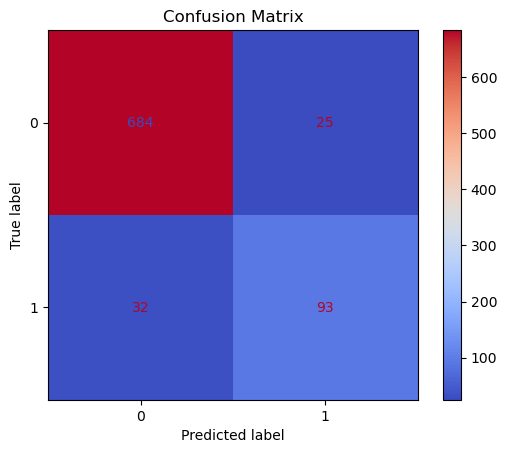

time: 79 ms (started: 2024-02-29 13:35:27 -05:00)


In [65]:
# Creating confusion matrix
random_forest_cm = confusion_matrix(y_test, final_model_y_preds)

# Displaying confusion matrix
final_rf = random_forest_pipe.named_steps['final_tree']
cm_display = ConfusionMatrixDisplay(confusion_matrix=random_forest_cm, display_labels=final_rf.classes_)

plt.figure(figsize=(8, 6))
cm_display.plot(cmap='coolwarm', xticks_rotation='horizontal')
plt.title("Confusion Matrix")
plt.show()

We see in this confusion matrix a confirmation that we've slightly reduced the number of false negative predictions. Our original random forest had 5 more incorrect precitions there. We've slightly increased our rate of false positives, but that matters less in this context. This matrix shows that our model has indeed made some progress and improvement in the area we were focusing on.

## Feature Importances

To better understand which features are the most important in our model's calculations, we can make a chart of our feature importances. Below, we can see all the features listed out, with each feature having a measure of importance to the outcome of a prediction.

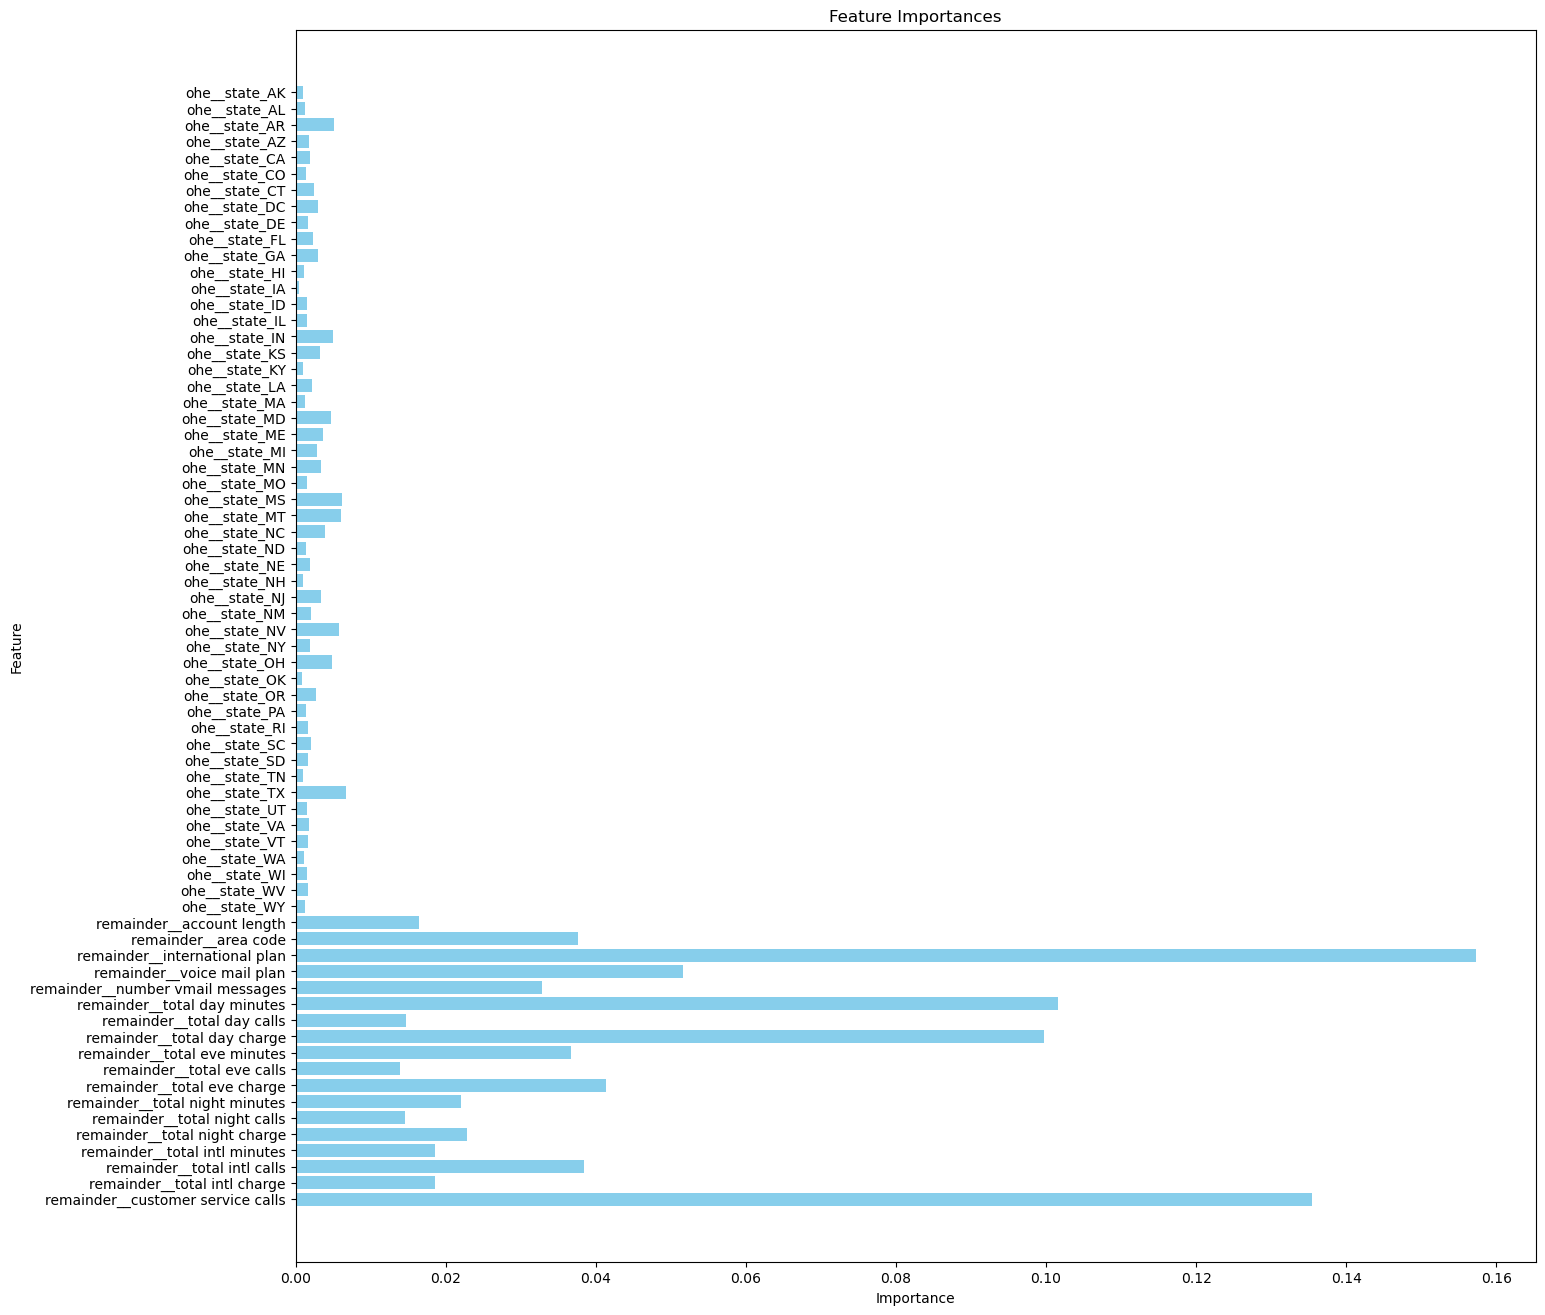

time: 416 ms (started: 2024-02-29 13:35:27 -05:00)


In [66]:
# Getting feature importances
feature_importances = final_rf.feature_importances_

# Getting feature names out of one-hot encoding step
one_hot_encoder = tuned_rf_pipe.named_steps['ohe']
encoded_feature_names = one_hot_encoder.get_feature_names_out()

# 
feature_importances = tuned_rf_pipe.named_steps['final_tree'].feature_importances_

importances_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': feature_importances
})

importances = importances_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(16, 16))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

So, as we can see, there are a lot of features to go over since we one-hot encoded state, which added 50 coumns to the dataset. The two standout features are the possession of an international plan and the number of customer service calls made. This shouldn't be surprising if we look back at our correlation heatmap, as those features were the most correlated with churn. We can also see that total day minutes and charges play a large role in determining churn. We take a fairly steep drop below that, with voice mail plan contributing a little along with evening and international call charges.

Another cool find is that the feature importance for states doesn't always mimic the churn rate map we plotted at the beginning of the project! If we look closely, we can see that some high-rate states like Texas have a proportionally larger importance, but we also see lower-rate staes like Arizona and Nevada having higher importance than their churn rate would suggest.

Here's a better look at the top 10 importances:

In [67]:
importances.head(10)

,Feature,Importance
53,remainder__international plan,0.157340
68,remainder__customer service calls,0.135446
56,remainder__total day minutes,0.101521
58,remainder__total day charge,0.099701
54,remainder__voice mail plan,0.051626
61,remainder__total eve charge,0.041328
66,remainder__total intl calls,0.038402
52,remainder__area code,0.037590
59,remainder__total eve minutes,0.036724
55,remainder__number vmail messages,0.032870


time: 2.11 ms (started: 2024-02-29 13:35:28 -05:00)


# Conclusions

Our iterative modeling process has yielded a final classifier that is effective at predicting customer churn. With an accuracy score of 93%, we know that our predictions will be pretty reliable. We also have achieved excellent recall on the negative case. While the recall for the positive case is lagging behind, our model has proven that the class bias can be improved with fine-tuning. Based on this model, its feature importances, and predictions, our recommendations would be:

- #### Flag customers with accounts that match key features:
    - Above-average number of customer service calls
    - High international minutes
    - High day minutes
    
- #### Offer special promotions to flagged accounts, especially ones with multiple customer service calls or high international minutes

- #### Consider changing day rates for high-churn states

The core strategy of these recommendations uses our model to identify accounts that are at a high risk for churn. These customers could be ones who have made an above-average number of customer service calls, or simply ones who are paying high bills for day or international usage. Once those accounts are identified, high-risk customers can be targeted with special rate packages, free minutes, upgrades, or other promotions that make continued loyalty more attractive than switching plans. Timely identification of high-risk accounts using the patterns identified by our model should open the door for a significant increase in customer retention and satisfaction.

## Next Steps

While our model is performing well, it could be improved. First and foremost, another step would be to expand the dataset. More features and more rows of customer information would likely improve performance even further, since we were able to achieve 93% accuracy with only around 3300 rows of data. Further analysis could include:

- In-depth geographical breakdowns of churn
- Time-of-year analysis
- Content analysis of customer service calls

## Contact Information

- Email: apell7591@gmail.com
- Phone: 917-434-6615
- GitHub: [apell7594](https://github.com/apell74)
- LinkedIn: [Adam Pell](www.linkedin.com/in/adam-pell-911868154)